In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import các thư viện**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# **Đọc dữ liệu**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Visualization/DATA VISUALIZATION/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
num_rows, num_columns = df.shape
print(f'Số lượng quan sát: {num_rows}')
print(f'Số lượng cột: {num_columns}\n')
print(df.dtypes)

Số lượng quan sát: 2111
Số lượng cột: 17

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


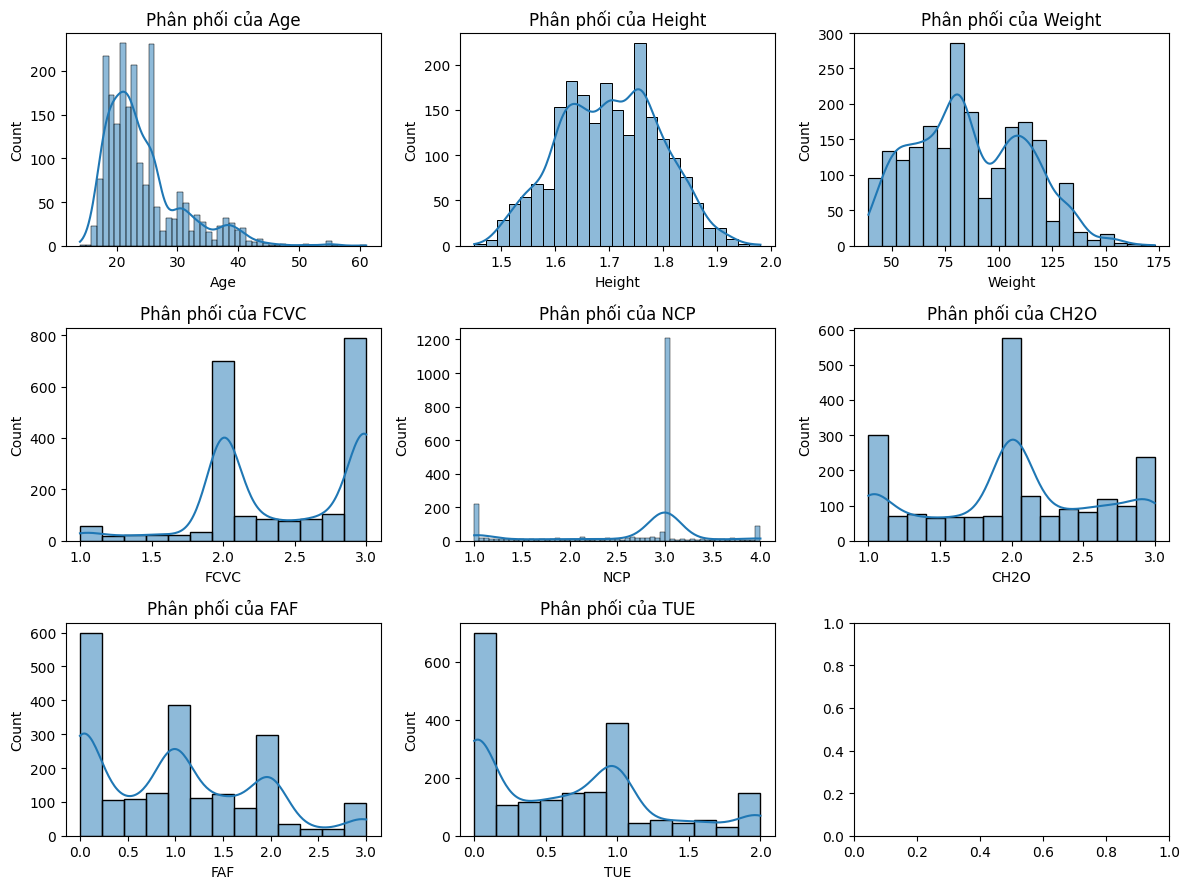

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
num_col = df.select_dtypes(include=['float64'])
for i, col in enumerate(num_col.columns):
    plt.subplot(3, 3, i+1)
    row = i // 3
    col_idx = i % 3
    sns.histplot(df[col], ax=axes[row, col_idx], kde=True)
    axes[row, col_idx].set_title(f'Phân phối của {col}')
plt.tight_layout()
plt.show()

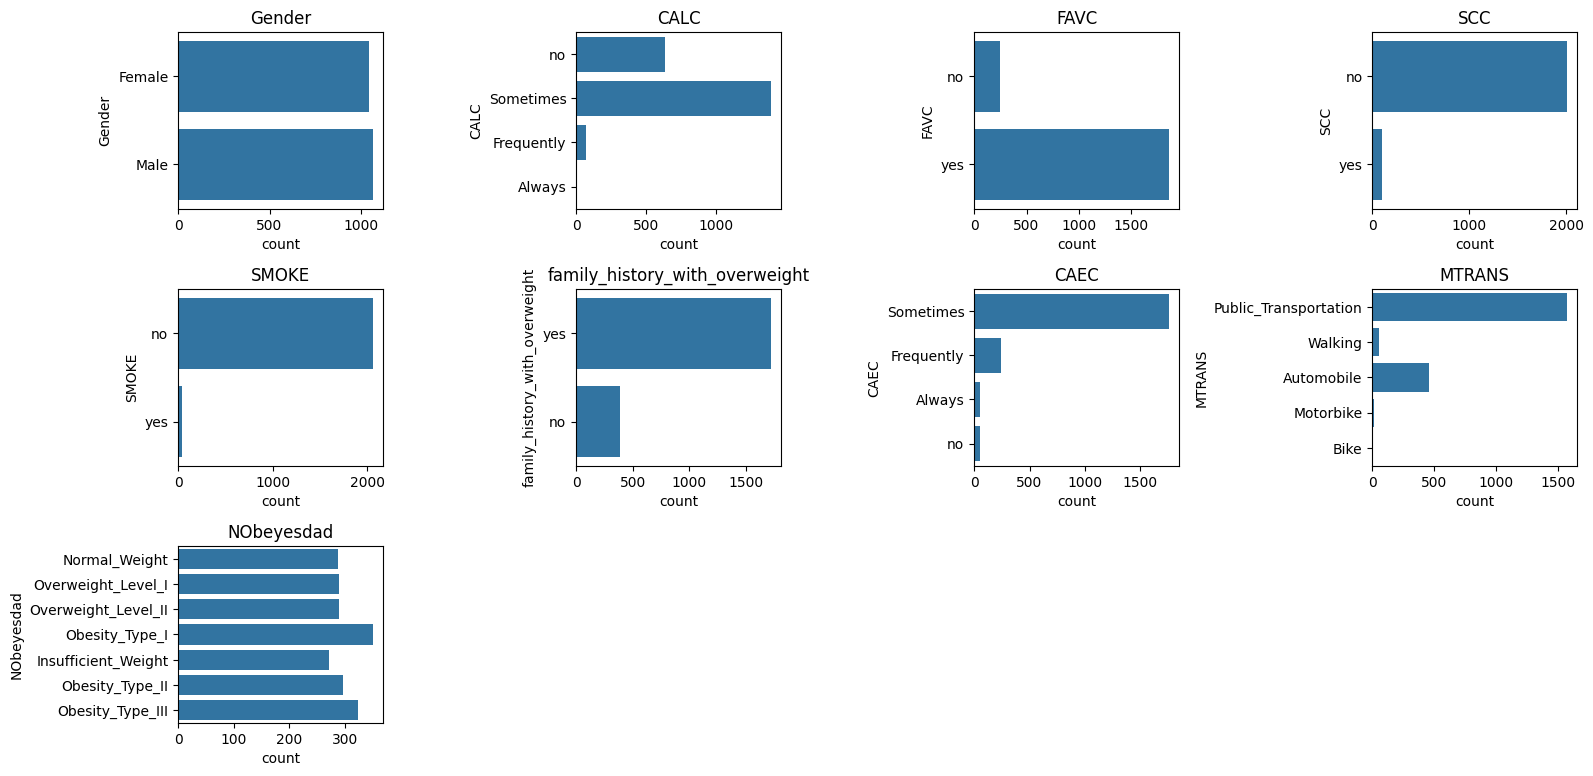

In [ ]:
cat_col = df.select_dtypes(include=['object', 'int64'])
plt.figure(figsize=(16, 10))

for i, col in enumerate(cat_col.columns):
  plt.subplot(4, 4, i+1)
  sns.countplot(y=col, data=df)
  plt.title(col)
plt.tight_layout()
plt.show()

### *KIỂM TRA ĐỊNH DẠNG DỮ LIỆU*

Kiểm tra biến có dữ liệu số nguyên

In [ ]:
print(isinstance(df['FCVC'][0], int))
print(isinstance(df['TUE'][0], int))
print(isinstance(df['NCP'][0], int))
print(isinstance(df['CH2O'][0], int))
print(isinstance(df['FAF'][0], int))

False
False
False
False
False


In [ ]:
df["TUE"] = df["TUE"].round(0).astype(int)
df["FCVC"] = df["FCVC"].round(0).astype(int)
df["NCP"] = df["NCP"].round(0).astype(int)
df["CH2O"] = df["CH2O"].round(0).astype(int)
df["FAF"] = df["FAF"].round(0).astype(int)

Kiểm tra biến nhị phân

In [ ]:
binary_variables = ['family_history_with_overweight', 'FAVC', 'SMOKE']
variables_not_binary = []

for var in binary_variables:
    if len(df[var].unique()) != 2:
        variables_not_binary.append(var)

print("Danh sách các biến không có 2 miền giá trị:", variables_not_binary)

Danh sách các biến không có 2 miền giá trị: []


Kiểm tra định dạng của các biến định tính

In [ ]:
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']
non_categorical = []

for col in categorical_cols:
    if not (df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])):
        non_categorical.append(col)
if non_categorical:
    print("Các biến KHÔNG phải là categorical:", non_categorical)
else:
    print("Tất cả các biến đều là categorical.")

Tất cả các biến đều là categorical.


Kiểm tra định dạng của biến liên tục

In [ ]:
continuous_cols = ['Age', 'Height', 'Weight', 'NCP', 'FAF', 'CH2O']
non_continuous = []
for col in continuous_cols:
    if not (pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 10):
        non_continuous.append(col)
if non_continuous:
    print("Các biến KHÔNG phải là liên tục:", non_continuous)
else:
    print("Tất cả các biến đều là liên tục.")

Các biến KHÔNG phải là liên tục: ['NCP', 'FAF', 'CH2O']


### THAY ĐỔI TÊN BIẾN

In [ ]:
#Thay đổi tên của các cột
name_map = {
    "Age": "age",
    "Gender": "gender",
    "Height": "height",
    "Weight": "weight",
    "CALC": "alcohol",
    "MTRANS": "transportation",
    "NObeyesdad": "obesity",
    "FAVC": "high_caloric",
    "FCVC": "vegetables",
    "NCP": "main_meals",
    "SCC": "cal_monitor",
    "SMOKE": "smoke",
    "CH2O": "water",
    "FAF": "physical_activity",
    "TUE": "tech_devices",
    "CAEC": "between_meals",
    "family_history_with_overweight": "family_history"
}

In [ ]:
df = df.rename(columns=name_map)
df.head()

,age,gender,height,weight,alcohol,high_caloric,vegetables,main_meals,cal_monitor,smoke,water,family_history,physical_activity,tech_devices,between_meals,transportation,obesity
0,21.0,Female,1.62,64.0,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Kiểm tra giá trị null

In [ ]:
missing_values = df.isnull().sum()
print('Các giá trị bị thiếu:')
print(missing_values)

Các giá trị bị thiếu:
age                  0
gender               0
height               0
weight               0
alcohol              0
high_caloric         0
vegetables           0
main_meals           0
cal_monitor          0
smoke                0
water                0
family_history       0
physical_activity    0
tech_devices         0
between_meals        0
transportation       0
obesity              0
dtype: int64


Kiểm tra giá trị bất thường

In [ ]:
abnormal_values = pd.DataFrame()
for column in df.columns:
    if df[column].dtype != 'object':
        abnormal = df[df[column] < 0]
        abnormal_values = pd.concat([abnormal_values, abnormal])
print("Các giá trị bất thường:")
print(abnormal_values)

Các giá trị bất thường:
Empty DataFrame
Columns: [age, gender, height, weight, alcohol, high_caloric, vegetables, main_meals, cal_monitor, smoke, water, family_history, physical_activity, tech_devices, between_meals, transportation, obesity]
Index: []


Kiểm tra và xử lý giá trị bị trùng lặp

In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated samples: {num_duplicates}")

df_no_duplicates = df.drop_duplicates(keep='first')

Number of duplicated samples: 24


# Thêm thuộc tính BMI

In [ ]:
df['BMI'] = round(df['weight'] / (df['height']) ** 2, 2)
df.head()

,age,gender,height,weight,alcohol,high_caloric,vegetables,main_meals,cal_monitor,smoke,water,family_history,physical_activity,tech_devices,between_meals,transportation,obesity,BMI
0,21.0,Female,1.62,64.0,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight,24.39
1,21.0,Female,1.52,56.0,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight,24.24
2,23.0,Male,1.80,77.0,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight,23.77
3,27.0,Male,1.80,87.0,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I,26.85
4,22.0,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II,28.34


# Vẽ biểu đồ phân phối cho các biến liên tục so với biến phụ thuộc

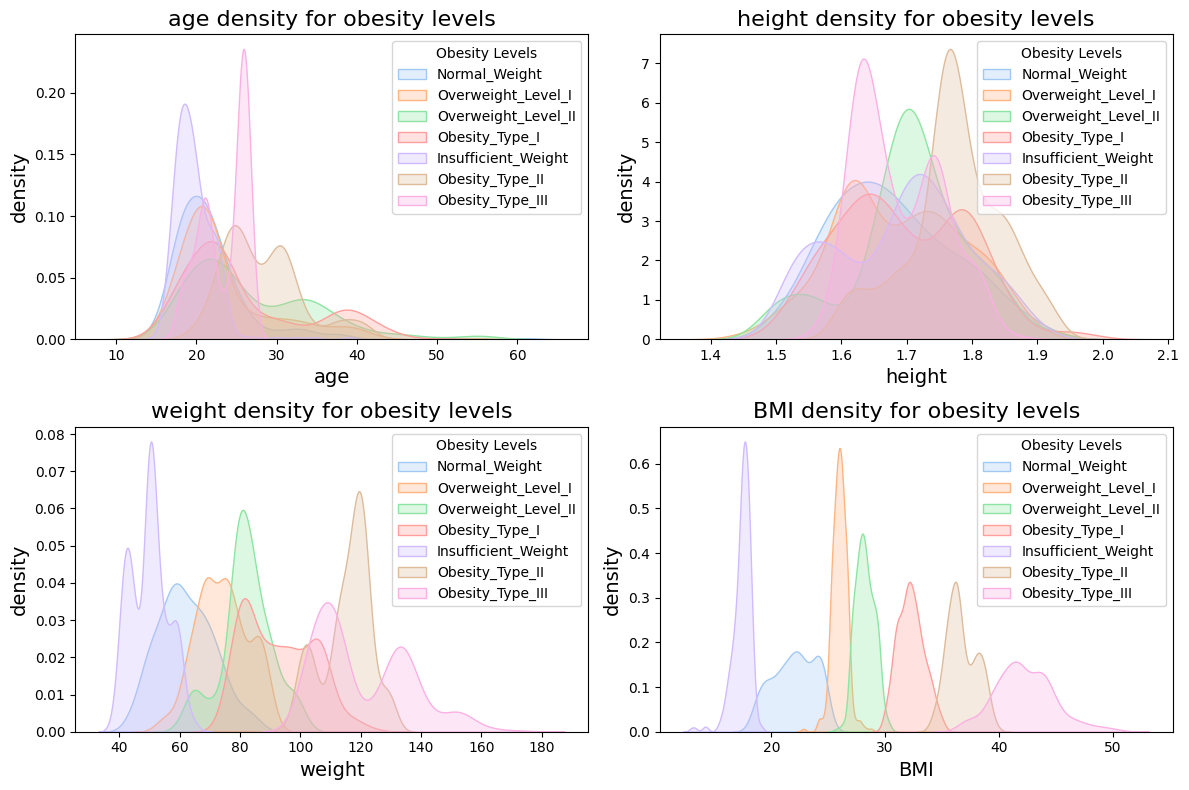

In [ ]:
obesity_levels = df["obesity"].unique()

palette = sns.color_palette("pastel", len(obesity_levels))

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_col.columns):
    plt.subplot(2, 2, i+1)
    for level, color in zip(obesity_levels, palette):
        sns.kdeplot(
            data=df[df["obesity"] == level],
            x=col,
            label=level,
            fill=True,
            alpha=0.3,
            color=color,
            common_norm=False
        )

    plt.title(f"{col} density for obesity levels", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("density", fontsize=14)
    plt.legend(title="Obesity Levels")
    plt.grid(visible=False)

plt.tight_layout()
plt.show()


# Vẽ biểu đồ phân phối cho các biến định tính và biến rời rạc so với biến phụ thuộc

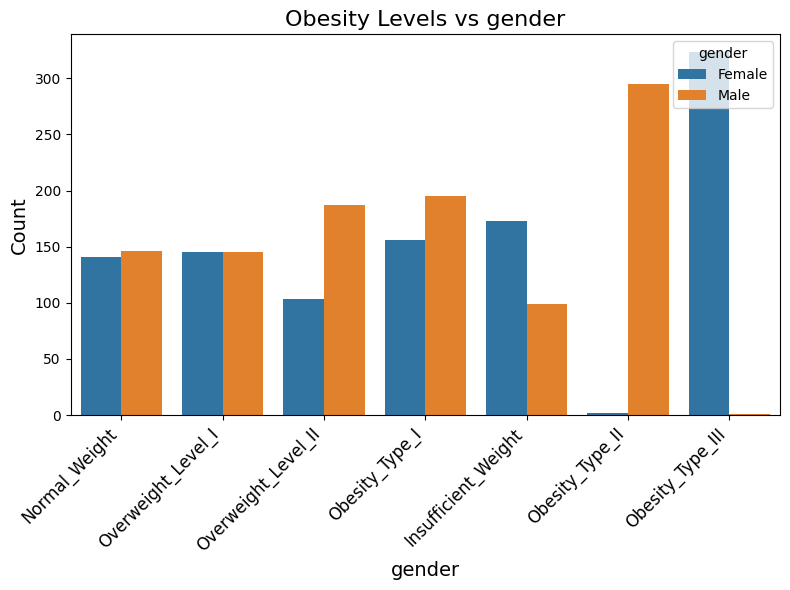

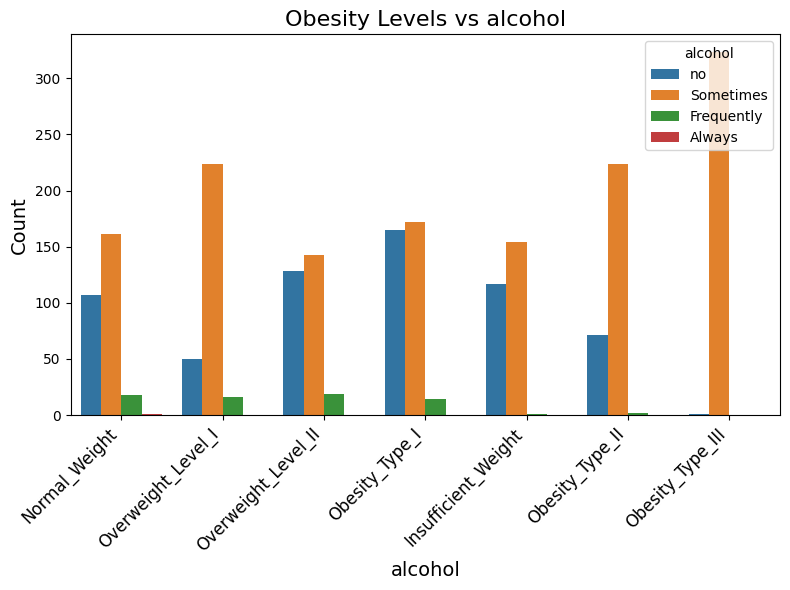

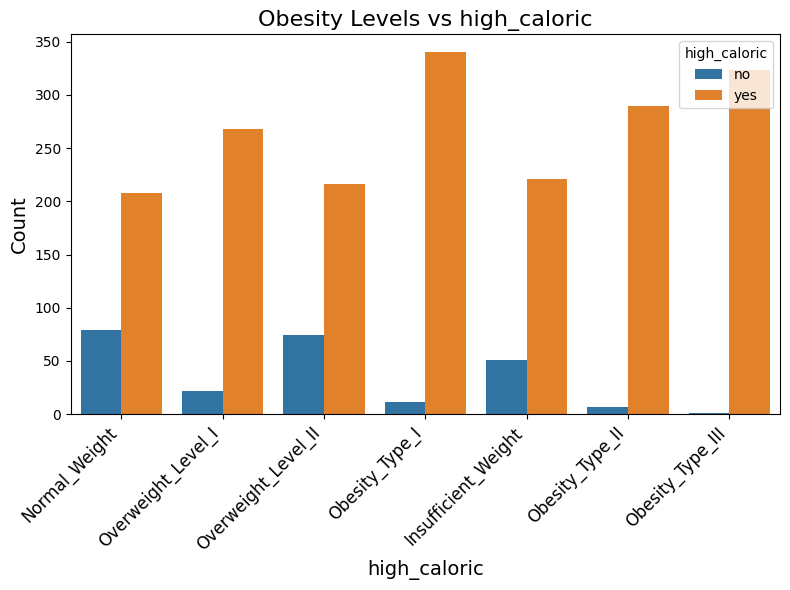

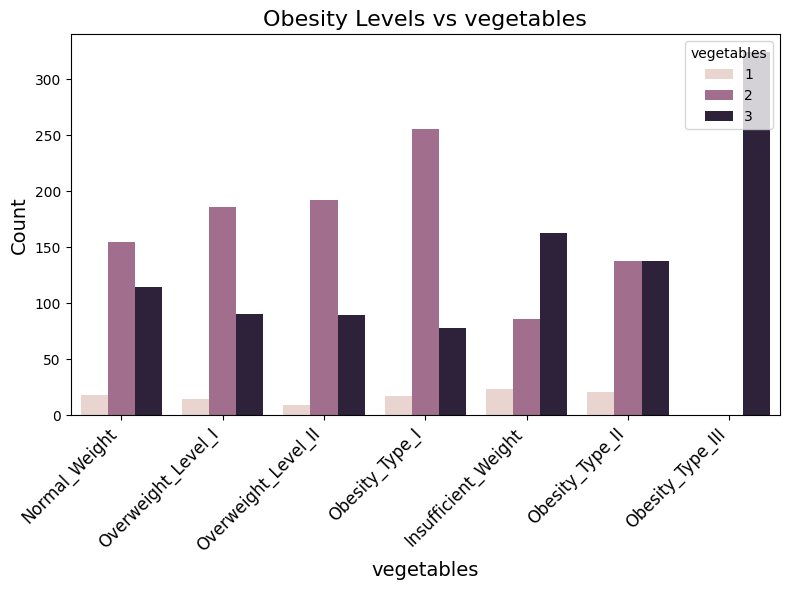

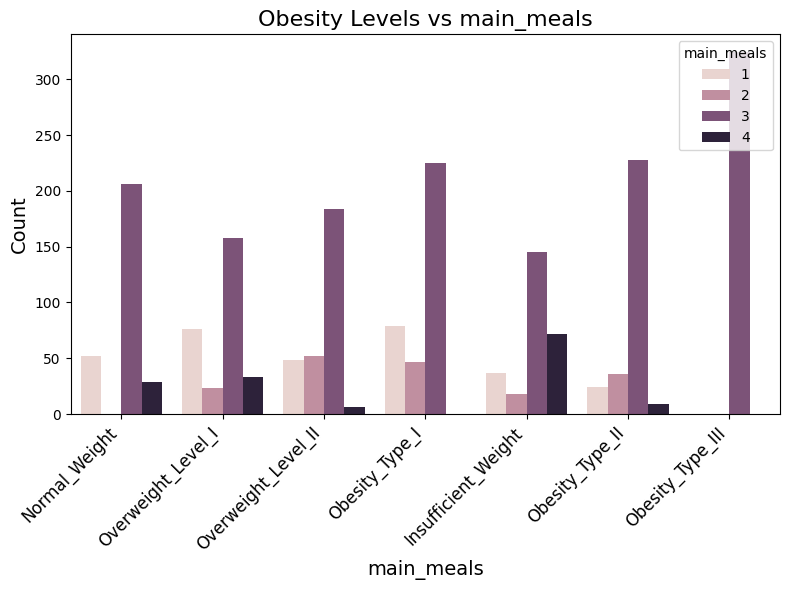

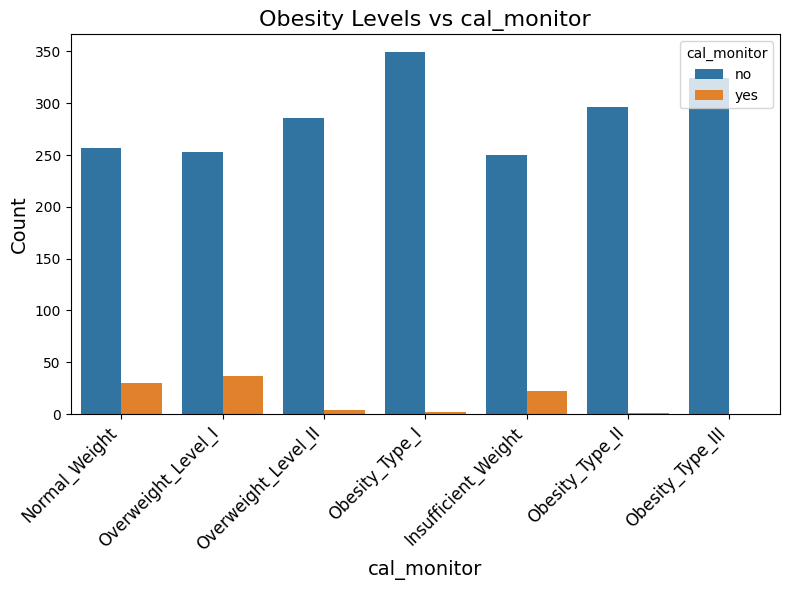

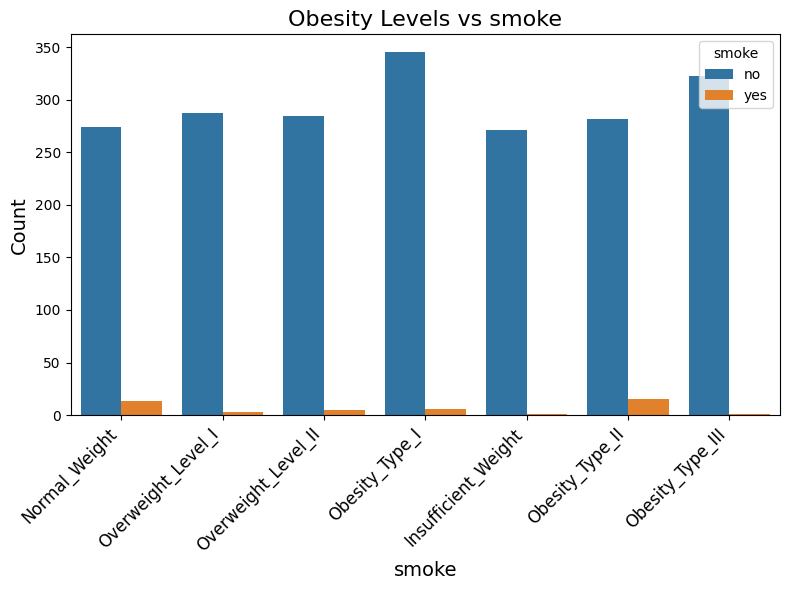

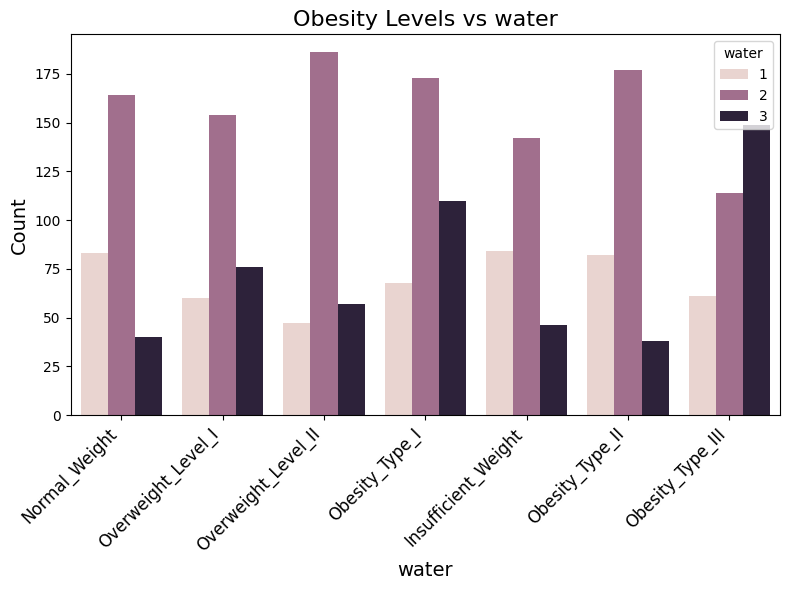

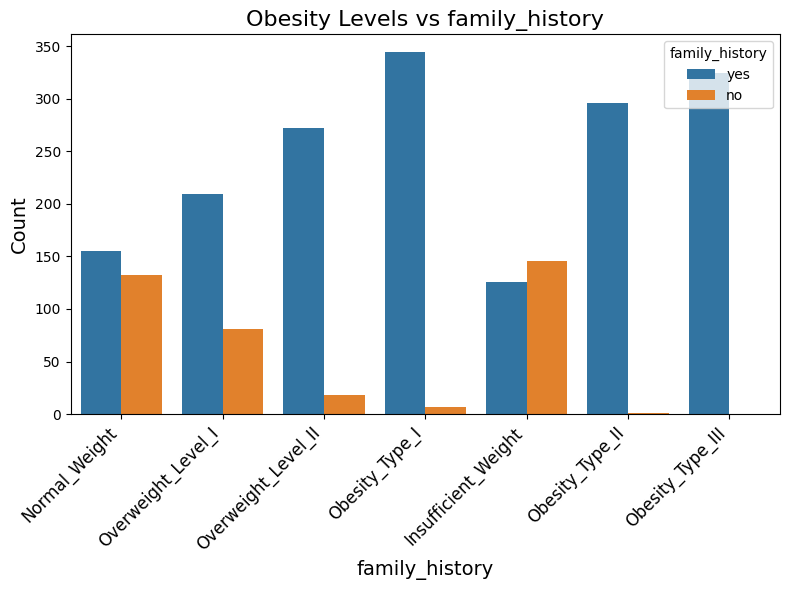

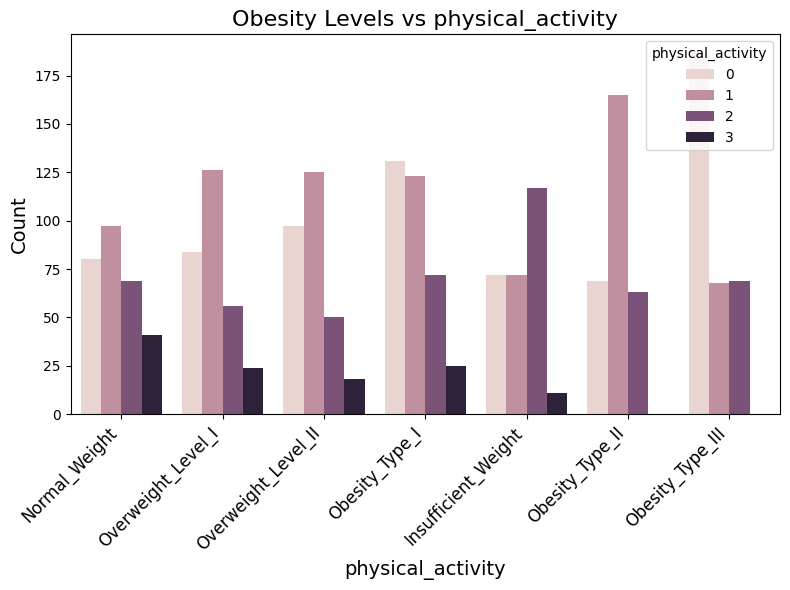

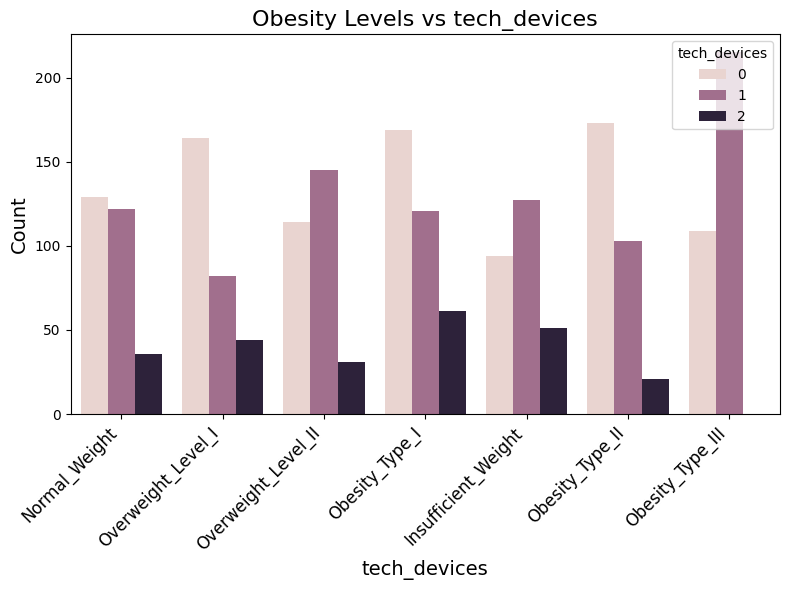

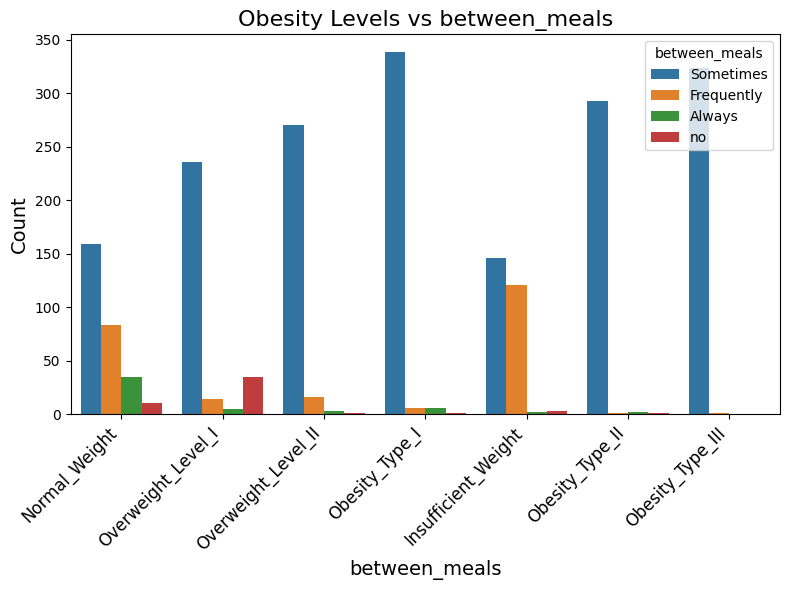

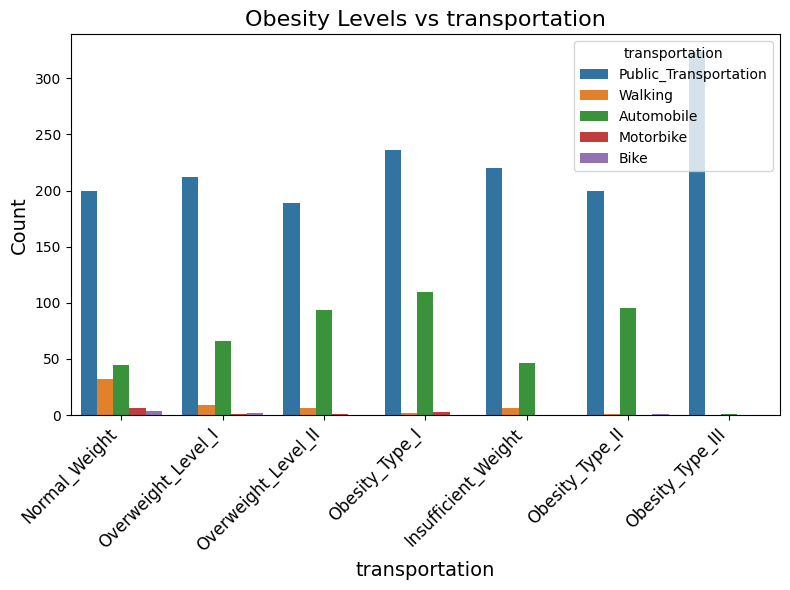

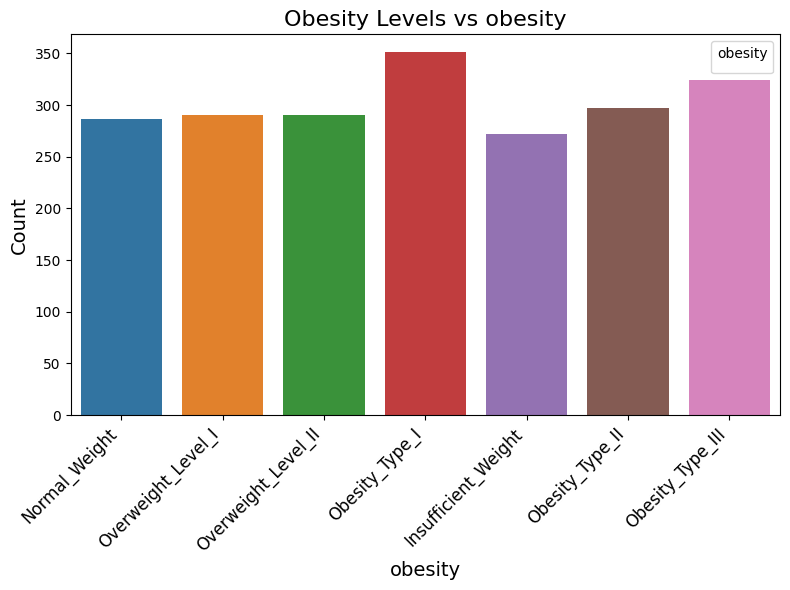

In [ ]:
cat_col = df.select_dtypes(include=['object', 'int64'])
for col in cat_col.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(
        data=df,
        hue=col,
        x="obesity")
    plt.title(f"Obesity Levels vs {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(title=col, loc="upper right")
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.tight_layout()
    plt.show()
